In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train_MpHjUjU.csv",parse_dates= ["MMM-YY","LastWorkingDate","Dateofjoining"])
test=pd.read_csv("test_hXY9mYw.csv")

In [3]:
df.head(3)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2


In [4]:
test.head(3)

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0


In [5]:
df.shape,test.shape

((19104, 13), (741, 2))

In [6]:
print(df.info(),"\n\n")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

### Removing Emp id's which are available in Test set from train set to create test data set for last evaluation 

In [7]:
k=df.isin({'Emp_ID': [394,	173,	1090,	840,	308,	1864,	1606,	954,	2422,	1841,	1484,	2727,	1031,	2137,	2568,	1745,	2668,	2617,	2070,	1446,	1043,	2561,	945,	2517,	1039,	2594,	115,	870,	329,	973,	1892,	2740,	1093,	693,	1817,	1753,	2420,	1655,	1573,	2365,	1623,	2625,	1335,	450,	2087,	2576,	2771,	1549,	1657,	1957,	1662,	1588,	2615,	2027,	2714,	556,	377,	605,	791,	1147,	68,	2784,	1181,	1782,	2299,	1238,	402,	1109,	990,	425,	569,	2454,	926,	391,	2110,	1875,	117,	1714,	1106,	422,	150,	2179,	2684,	762,	718,	1694,	1051,	2104,	1225,	63,	275,	1733,	2541,	140,	1037,	407,	1770,	946,	604,	893,	2200,	2114,	1243,	2076,	2597,	60,	662,	765,	199,	1526,	1486,	1179,	1161,	2259,	1191,	1811,	1510,	434,	1918,	753,	25,	1414,	1426,	716,	2283,	1840,	1678,	1859,	2381,	2008,	1050,	581,	2289,	713,	1924,	2257,	1504,	1670,	2551,	1874,	26,	2308,	1259,	77,	568,	1370,	704,	2494,	1077,	592,	2390,	832,	904,	2567,	1274,	2543,	296,	1374,	1852,	252,	888,	1234,	112,	2399,	1265,	2166,	320,	1968,	2690,	2228,	56,	723,	560,	580,	1679,	1783,	371,	2546,	2505,	2224,	1271,	213,	1936,	1642,	1213,	78,	368,	943,	1165,	1432,	2223,	2407,	1316,	1139,	789,	2552,	2670,	2028,	67,	2055,	2198,	2272,	2210,	2398,	272,	2754,	2473,	1327,	359,	2160,	1563,	1206,	1858,	516,	41,	1382,	1405,	2730,	772,	54,	1222,	697,	453,	1334,	992,	682,	766,	1283,	2148,	2729,	1668,	1290,	1013,	906,	2357,	87,	2533,	1532,	1977,	565,	1598,	400,	2109,	168,	956,	2417,	1276,	734,	550,	532,	2708,	2050,	358,	1177,	1267,	1982,	933,	538,	1057,	2453,	188,	2241,	552,	1119,	2382,	1284,	2480,	1658,	582,	2258,	444,	1633,	1958,	2334,	2633,	388,	537,	1579,	2193,	1263,	2318,	351,	835,	493,	341,	191,	1929,	991,	828,	234,	1869,	570,	2012,	323,	1249,	1989,	1830,	2496,	446,	1475,	1972,	639,	1888,	710,	2639,	2014,	848,	2781,	2199,	357,	494,	1178,	2611,	2728,	1149,	521,	375,	2763,	192,	658,	109,	2052,	1752,	2483,	2386,	2205,	2347,	2569,	644,	2449,	1230,	1652,	698,	1200,	1078,	1592,	210,	1144,	1980,	2096,	752,	258,	2610,	2217,	362,	619,	1527,	999,	431,	1793,	501,	483,	1605,	1836,	2464,	1914,	271,	1805,	2446,	1741,	2078,	45,	721,	265,	806,	587,	1884,	617,	1070,	2082,	137,	2788,	1447,	960,	2208,	865,	472,	441,	2699,	740,	1837,	782,	2715,	2344,	2169,	889,	233,	2497,	1495,	509,	981,	276,	31,	2511,	1801,	595,	2178,	324,	52,	1599,	1393,	643,	1505,	129,	1956,	2276,	1419,	2664,	1372,	785,	1097,	1831,	409,	289,	673,	225,	1776,	1345,	2322,	648,	1399,	2761,	1231,	571,	1962,	1594,	2705,	2498,	2090,	6,	1073,	1433,	2439,	1666,	1118,	1087,	1871,	345,	597,	1214,	2587,	1099,	959,	2672,	1676,	583,	1032,	1341,	2089,	1764,	1116,	1637,	1514,	2423,	458,	376,	1169,	2686,	2254,	1054,	524,	122,	2752,	988,	1015,	218,	2345,	39,	737,	2424,	2188,	1428,	2646,	2331,	642,	2135,	1198,	559,	875,	982,	1114,	243,	548,	1159,	1489,	2566,	2097,	678,	712,	681,	801,	1981,	273,	547,	1468,	1325,	1518,	902,	1712,	2311,	237,	1268,	2537,	2378,	104,	510,	1828,	2277,	2139,	1401,	620,	348,	2230,	531,	1707,	1696,	2565,	936,	1056,	2440,	1724,	1815,	2202,	1634,	2043,	1807,	2654,	135,	1066,	1586,	546,	594,	449,	415,	2058,	2418,	331,	2500,	2343,	1965,	114,	1416,	591,	2426,	1125,	1438,	1322,	1286,	1434,	867,	2645,	2640,	385,	1725,	427,	499,	1381,	1550,	1804,	543,	80,	1710,	1190,	1115,	97,	1019,	462,	1873,	2764,	2775,	2260,	47,	1014,	1622,	206,	1199,	85,	2018,	281,	263,	403,	2395,	1294,	134,	646,	885,	1462,	2153,	14,	72,	382,	2722,	754,	1766,	420,	294,	1839,	2032,	459,	963,	1775,	1999,	366,	793,	1515,	2191,	2538,	1723,	202,	1626,	1153,	1379,	769,	417,	498,	1802,	181,	2307,	1618,	2,	2279,	1351,	283,	2469,	650,	2627,	2348,	2515,	412,	751,	2678,	1201,	1529,	457,	1026,	814,	335,	1791,	1625,	1501,	763,	2635,	1107,	2411,	534,	952,	1412,	62,	2770,	2140,	2778,	2428,	2571,	1324,	2239,	1227,	1448,	2290,	1209,	2550,	1358,	540,	306,	810,	2631,	1740,	2030,	834,	1632,	2298,	11,	1521,	1650,	1273,	1619,	1157,	398,	1568,	148,	664,	310,	825,	1955,	1812,	1194,	1880,	599,	816,	508,	309,	1328,	1162,	733,	2039,	378,	2360,	824,	1708,	511,	2060,	802,	1925,	297,	715,	2233,	1195,	1145,	748,	1971,	1029,	288,	2521,	575,	2261,	561,	274,	913,	622,	205,	1210,	711,	2088,	2522,	1188,	1111,	2753,	638,	440,	2660,	2487,	2196,	2725,	2314,	819,	2189,	2251,	2134,	2255,	448,	1644,	624,

]})

In [8]:
df["Match"]=k["Emp_ID"]
df["Match"]=df.Match.map({True:1,False:0})

## Finalize Data sets

In [9]:
Test=df[(df["Match"]==1)]
df_org=df[(df["Match"]==0)]
df=df_org

In [10]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Match
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0


In [11]:
Test.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Match
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,1
13,2017-08-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,1,1
14,2017-09-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,1,1
15,2017-10-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2,1


In [12]:
Test_bckp=Test.copy()

In [13]:

#Again changing the dtype of date columns 
df["MMM-YY"]=pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"],format="%Y%m%d")
df["LastWorkingDate"]=pd.to_datetime(df["LastWorkingDate"],format="%Y%m%d")


Test["MMM-YY"]=pd.to_datetime(Test["MMM-YY"])
Test["Dateofjoining"]=pd.to_datetime(Test["Dateofjoining"],format="%Y%m%d")
Test["LastWorkingDate"]=pd.to_datetime(Test["LastWorkingDate"],format="%Y%m%d")

#checking 
df.dtypes

MMM-YY                  datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Designation                      int64
Total Business Value             int64
Quarterly Rating                 int64
Match                            int64
dtype: object

In [14]:
df["LastWorkingDate"]=df["LastWorkingDate"].dt.date
df["LastWorkingDate"]=df["LastWorkingDate"].fillna(0)


Test["LastWorkingDate"]=Test["LastWorkingDate"].dt.date
Test["LastWorkingDate"]=Test["LastWorkingDate"].fillna(0)

In [15]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Match
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0


In [16]:
df["Target"]=np.where(df.LastWorkingDate!=0,1,0)
Test["Target"]=np.where(Test.LastWorkingDate!=0,1,0)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Match,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,2381060,2,0,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,-665480,2,0,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0


In [17]:
classes=df['Target'].value_counts()
normal_share=classes[0]/df['Target'].count()*100
fraud_share=classes[1]/df['Target'].count()*100
print("Count of Normal_share is {:.2f} and fraud_share is {:.2f}".format(normal_share,fraud_share))

Count of Normal_share is 84.63 and fraud_share is 15.37


- train Data is highly imbalanced 

In [18]:
Test.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Match,Target
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,0,2,2,0,1,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,0,2,2,0,1,1,0
13,2017-08-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,1,1,0
14,2017-09-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,1,1,0
15,2017-10-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,2,1,0


In [19]:
#Renaming Columns
df=df.rename(columns={"MMM-YY":"Reporting_Date","Joining Designation":"Joining_Designation",\
                      "Total Business Value":"Total_Business_Value",\
                      "Quarterly Rating":"Quarterly_Rating"})

Test=Test.rename(columns={"MMM-YY":"Reporting_Date","Joining Designation":"Joining_Designation",\
                      "Total Business Value":"Total_Business_Value",\
                      "Quarterly Rating":"Quarterly_Rating"})


df[:5]

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,2381060,2,0,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,-665480,2,0,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0


In [20]:
df["Reporting_Year"]=df.Reporting_Date.dt.year
df["Reporting_Month"]=df.Reporting_Date.dt.month
df["Reporting_Week"]=df.Reporting_Date.dt.week

'''*********************************************************'''
df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"])
df["Join_Year"]=df.Dateofjoining.dt.year
df["Join_month"]=df.Dateofjoining.dt.month
df["Join_week"]=df.Dateofjoining.dt.week




Test["Reporting_Year"]=Test.Reporting_Date.dt.year
Test["Reporting_Month"]=Test.Reporting_Date.dt.month
Test["Reporting_Week"]=Test.Reporting_Date.dt.week

'''*********************************************************'''
Test["Dateofjoining"]=pd.to_datetime(Test["Dateofjoining"])
Test["Join_Year"]=Test.Dateofjoining.dt.year
Test["Join_month"]=Test.Dateofjoining.dt.month
Test["Join_week"]=Test.Dateofjoining.dt.week

In [21]:
#Seperating Month , year and day from date columns 
df.dtypes

Reporting_Date          datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate                 object
Joining_Designation              int64
Designation                      int64
Total_Business_Value             int64
Quarterly_Rating                 int64
Match                            int64
Target                           int32
Reporting_Year                   int64
Reporting_Month                  int64
Reporting_Week                   int64
Join_Year                        int64
Join_month                       int64
Join_week                        int64
dtype: object

In [22]:
df.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,2381060,2,0,0,2016,1,53,2015,12,52
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,-665480,2,0,0,2016,2,5,2015,12,52
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0,1,2016,3,9,2015,12,52
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2016,12,48,2016,12,49
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2017,1,52,2016,12,49


In [23]:
df.isnull().sum()

Reporting_Date          0
Emp_ID                  0
Age                     0
Gender                  0
City                    0
Education_Level         0
Salary                  0
Dateofjoining           0
LastWorkingDate         0
Joining_Designation     0
Designation             0
Total_Business_Value    0
Quarterly_Rating        0
Match                   0
Target                  0
Reporting_Year          0
Reporting_Month         0
Reporting_Week          0
Join_Year               0
Join_month              0
Join_week               0
dtype: int64

In [24]:
# Creating Backups before EDA
df_backup=df.copy()
test_backuup=Test.copy()

In [25]:
df.describe(percentiles=(0.05,0.25,0.5,0.75,0.95,0.99),include="all")

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week
count,10516,10516.000000,10516.000000,10516,10516,10516,10516.000000,10516,10516.0,10516.000000,10516.000000,1.051600e+04,10516.000000,10516.0,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000
unique,24,NaN,NaN,2,29,3,NaN,704,494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-01 00:00:00,NaN,NaN,Male,C20,Master,NaN,2016-07-04 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,802,NaN,NaN,6144,634,3628,NaN,110,8900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1421.849372,33.881229,NaN,NaN,NaN,59380.189996,NaN,NaN,1.702358,2.062381,3.437166e+05,1.644637,0.0,0.153671,2016.357645,5.723849,27.095474,2015.046405,7.008844,28.875048
std,NaN,809.530151,6.229519,NaN,NaN,NaN,28708.364458,NaN,NaN,0.834719,0.969878,7.968340e+05,0.865628,0.0,0.360650,0.479330,3.398275,15.773022,1.658115,3.132426,13.645459
min,NaN,1.000000,21.000000,NaN,NaN,NaN,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000,0.0,0.000000,2016.000000,1.000000,5.000000,2010.000000,1.000000,1.000000
5%,NaN,143.750000,25.000000,NaN,NaN,NaN,20983.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000,0.0,0.000000,2016.000000,1.000000,5.000000,2012.000000,1.000000,3.000000


# EDA

In [26]:
df.shape

(10516, 21)

In [27]:
df.isnull().sum()

Reporting_Date          0
Emp_ID                  0
Age                     0
Gender                  0
City                    0
Education_Level         0
Salary                  0
Dateofjoining           0
LastWorkingDate         0
Joining_Designation     0
Designation             0
Total_Business_Value    0
Quarterly_Rating        0
Match                   0
Target                  0
Reporting_Year          0
Reporting_Month         0
Reporting_Week          0
Join_Year               0
Join_month              0
Join_week               0
dtype: int64

In [28]:
df.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,2381060,2,0,0,2016,1,53,2015,12,52
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,-665480,2,0,0,2016,2,5,2015,12,52
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0,1,2016,3,9,2015,12,52
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2016,12,48,2016,12,49
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2017,1,52,2016,12,49


In [29]:
df.describe(percentiles=(0.01,0.25,0.50,0.75,0.95,0.99))

,Emp_ID,Age,Salary,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week
count,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,1.051600e+04,10516.000000,10516.0,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000
mean,1421.849372,33.881229,59380.189996,1.702358,2.062381,3.437166e+05,1.644637,0.0,0.153671,2016.357645,5.723849,27.095474,2015.046405,7.008844,28.875048
std,809.530151,6.229519,28708.364458,0.834719,0.969878,7.968340e+05,0.865628,0.0,0.360650,0.479330,3.398275,15.773022,1.658115,3.132426,13.645459
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,0.0,0.000000,2016.000000,1.000000,5.000000,2010.000000,1.000000,1.000000
1%,29.000000,22.000000,14113.000000,1.000000,1.000000,-1.237400e+04,1.000000,0.0,0.000000,2016.000000,1.000000,5.000000,2010.000000,1.000000,1.000000
25%,734.000000,29.000000,38619.000000,1.000000,1.000000,0.000000e+00,1.000000,0.0,0.000000,2016.000000,3.000000,13.000000,2015.000000,5.000000,20.000000
50%,1449.500000,33.000000,54355.000000,1.000000,2.000000,1.029100e+05,1.000000,0.0,0.000000,2016.000000,5.000000,26.000000,2015.000000,7.000000,29.000000
75%,2131.000000,38.000000,76195.000000,2.000000,3.000000,4.065650e+05,2.000000,0.0,0.000000,2017.000000,8.250000,39.000000,2016.000000,10.000000,41.000000
95%,2649.000000,45.000000,115159.000000,3.000000,4.000000,1.417518e+06,3.000000,0.0,1.000000,2017.000000,12.000000,53.000000,2017.000000,12.000000,49.000000
99%,2757.000000,50.000000,137450.000000,4.000000,4.000000,3.303173e+06,4.000000,0.0,1.000000,2017.000000,12.000000,53.000000,2017.000000,12.000000,52.000000


# Salary

#### Checking for outliers in data 

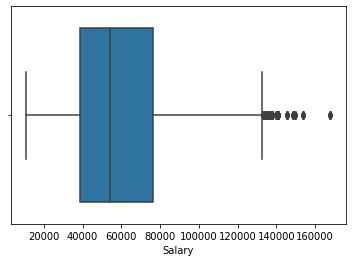

In [30]:
sns.boxplot(df["Salary"]);

- As per above information we can see that salary values have high inflation above 100000 range which indicates outliers are present in column salary 

In [31]:
# removing (statistical) outliers dataset 
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Salary >= Q1 - 1.5*IQR) & (df.Salary <= Q3 + 1.5*IQR)]

# removing (statistical) outliers from test set 
Q1 = Test.Salary.quantile(0.25)
Q3 = Test.Salary.quantile(0.75)
IQR = Q3 - Q1
Test = Test[(Test.Age >= Q1 - 1.5*IQR) & (Test.Age <= Q3 + 1.5*IQR)]

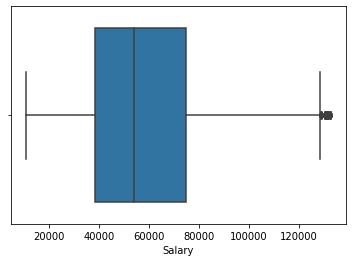

In [32]:
sns.boxplot(df["Salary"]);

### Gender vs Quarterly Ratings

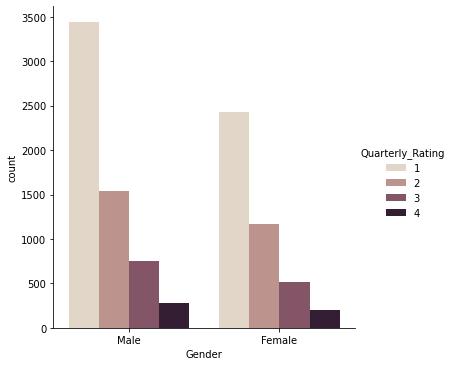

In [33]:
sns.catplot(x="Gender", kind="count", palette="ch:.25",hue="Quarterly_Rating", data=df);

- Most of the employees who have hight tendcy to leave the oragnisation are male employees compare to female
- Only few employees (Both male and female) have good quaterley ratings 

### Education_Level vs Quarterly Ratings

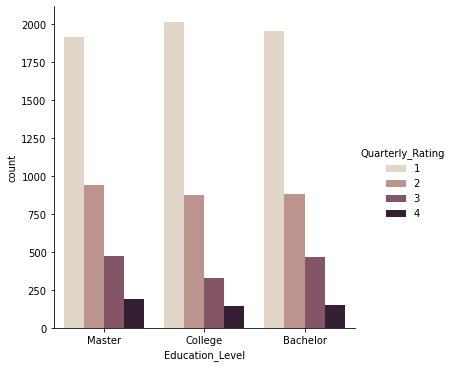

In [34]:
sns.catplot(x="Education_Level", kind="count", palette="ch:.25",hue="Quarterly_Rating", data=df);

- As per above graph it seems young employees having less expirence  are performing better than employees having high expirence and educational degree

- Bachelor >Master>College

### Salary vs Quarterly Ratings

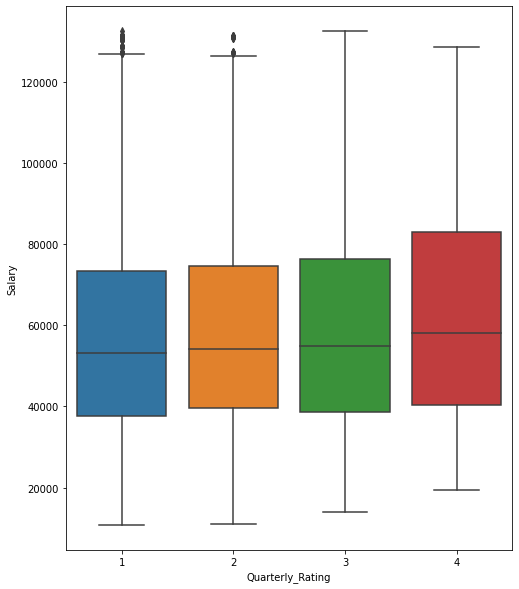

In [35]:
plt.figure(figsize=(8,10))
sns.boxplot(x="Quarterly_Rating", y="Salary",data=df);

- employees having salary range between 35000 to 40000 and 295000 to 300000 are not doing good there quarterly rating is not up to the mark have high tendency to leave the oragnisation 

### City vs Emp_id

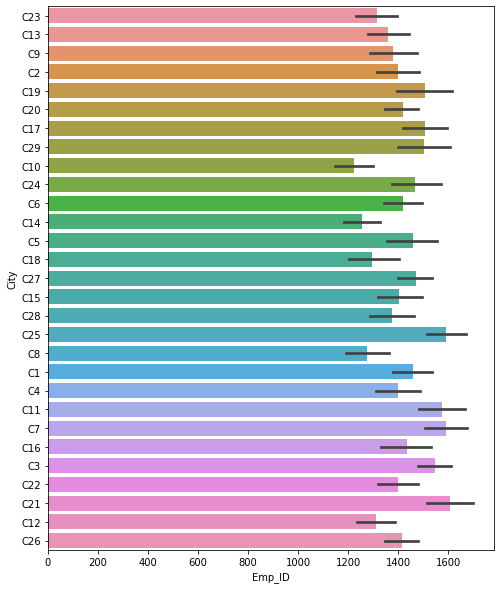

In [36]:
plt.figure(figsize=(8,10))
sns.barplot(x="Emp_ID", y="City",data=df);

- Most of the Employees belong to city "C25" and very less belongs to city "C14"

In [37]:
df.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,2381060,2,0,0,2016,1,53,2015,12,52
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,-665480,2,0,0,2016,2,5,2015,12,52
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0,1,2016,3,9,2015,12,52
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2016,12,48,2016,12,49
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2017,1,52,2016,12,49


In [38]:
Test.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,0,2,2,0,1,1,0,2017,11,44,2017,11,45
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,0,2,2,0,1,1,0,2017,12,48,2017,11,45
13,2017-08-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,1,1,0,2017,8,31,2017,7,31
14,2017-09-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,1,1,0,2017,9,35,2017,7,31
15,2017-10-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,2,1,0,2017,10,39,2017,7,31


## Age

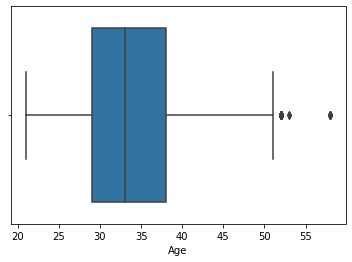

In [39]:
sns.boxplot(df.Age);

In [40]:
# removing (statistical) outliers dataset 
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Age >= Q1 - 1.5*IQR) & (df.Age <= Q3 + 1.5*IQR)]

# removing (statistical) outliers from test set 
Q1 = Test.Age.quantile(0.25)
Q3 = Test.Age.quantile(0.75)
IQR = Q3 - Q1
Test = Test[(Test.Age >= Q1 - 1.5*IQR) & (Test.Age <= Q3 + 1.5*IQR)]

In [41]:
Test.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,0,2,2,0,1,1,0,2017,11,44,2017,11,45
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,0,2,2,0,1,1,0,2017,12,48,2017,11,45
13,2017-08-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,1,1,0,2017,8,31,2017,7,31
14,2017-09-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,1,1,0,2017,9,35,2017,7,31
15,2017-10-01,6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0,2,1,0,2017,10,39,2017,7,31


### Age vs Quarterly Ratings

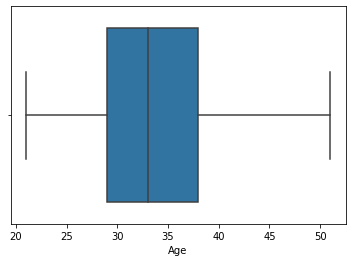

In [42]:
sns.boxplot(df.Age);

In [43]:
df.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,2381060,2,0,0,2016,1,53,2015,12,52
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,-665480,2,0,0,2016,2,5,2015,12,52
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0,1,2016,3,9,2015,12,52
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2016,12,48,2016,12,49
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2017,1,52,2016,12,49


# Age vs Quarterly_Rating

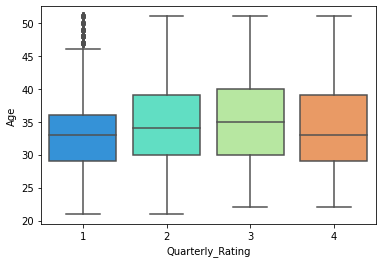

In [44]:
sns.boxplot(x='Quarterly_Rating',y='Age',data=df,palette='rainbow');

- Employee fall under age range between 28-33 have higher risk to resign compare to emplyees

## Total_Business_Value vs Education_Level

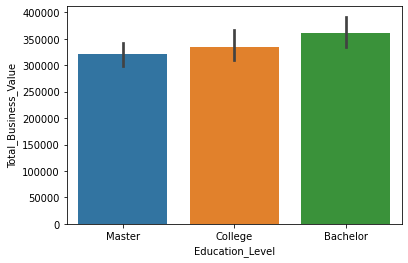

In [45]:
sns.barplot(x='Education_Level',y='Total_Business_Value',data=df);

# Feature Engineearing

### Effect of Permoted employees over Quarterly Rating 

In [46]:
df[["Joining_Designation","Designation"]][:5]

,Joining_Designation,Designation
0,1,1
1,1,1
2,1,1
5,2,2
6,2,2


In [47]:
df["Permoted"]=np.where(df.Joining_Designation==df.Designation,0,1)
Test["Permoted"]=np.where(Test.Joining_Designation==Test.Designation,0,1)

In [48]:
df.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,Match,Target,Reporting_Year,Reporting_Month,Reporting_Week,Join_Year,Join_month,Join_week,Permoted
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,2381060,2,0,0,2016,1,53,2015,12,52,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,0,1,1,-665480,2,0,0,2016,2,5,2015,12,52,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,0,1,2016,3,9,2015,12,52,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2016,12,48,2016,12,49,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,0,2,2,0,1,0,0,2017,1,52,2016,12,49,0


In [49]:
df.Permoted.value_counts()

0    7913
1    2355
Name: Permoted, dtype: int64

- Out of 17411 Active employees only 6246 got permoted 

### Permotion vs Traget Variable

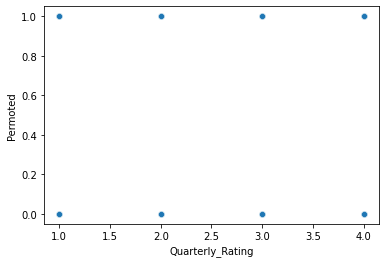

In [50]:
sns.scatterplot(x='Quarterly_Rating',y='Permoted',data=df);

- 0 : Not Permoted 1: Permoted

- No Realtion Between Permotion and Qaurterly rating

### Permotion vs Education Level

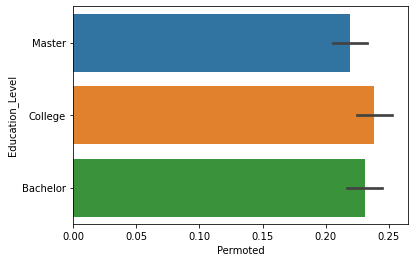

In [51]:
sns.barplot(x='Permoted',y='Education_Level',data=df);

- Employees who have done Master's are very less to get permoted compare to other class

In [52]:
df.dtypes

Reporting_Date          datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate                 object
Joining_Designation              int64
Designation                      int64
Total_Business_Value             int64
Quarterly_Rating                 int64
Match                            int64
Target                           int32
Reporting_Year                   int64
Reporting_Month                  int64
Reporting_Week                   int64
Join_Year                        int64
Join_month                       int64
Join_week                        int64
Permoted                         int32
dtype: object

# Data Preprocessing

In [53]:
#General Encoding for Binary label few labels columns
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
Test["Gender"]=Test["Gender"].map({"Male":1,"Female":0})

#Label Encoding for city column 
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


df["City"]=lb.fit_transform(df["City"])
Test["City"]=lb.fit_transform(Test["City"])

Education_level1=pd.get_dummies(df.Education_Level,drop_first=True)
Education_level2=pd.get_dummies(df.Education_Level,drop_first=True)

df=pd.concat([df,Education_level1],axis=1)
Test=pd.concat([Test,Education_level2],axis=1)

Test.drop(['Education_Level'],axis=1,inplace=True)
df.drop(['Education_Level'],axis=1,inplace=True)


In [54]:
Test.shape

(18759, 23)

# Removing Unwanted cols

In [55]:
df.drop(["Match"],1,inplace=True)
Test.drop(["Match"],1,inplace=True)

In [56]:
df.drop(["LastWorkingDate"],1,inplace=True)
Test.drop(["LastWorkingDate"],1,inplace=True)

## Grouping Datasets by taking aggr np.mean to avoid outliers 

In [57]:
df=df.groupby(by="Emp_ID").mean()
Test=Test.groupby(by="Emp_ID").mean()

In [58]:
from sklearn.preprocessing import MinMaxScaler
sclr=MinMaxScaler()

In [59]:
vars=['Age', 'Salary',\
      'Total_Business_Value'
      ]


In [60]:
df[vars]=sclr.fit_transform(df[vars])
Test[vars]=sclr.transform(Test[vars])

In [61]:
Test=Test.fillna(0)

## Data Split / Class Embalance/Smote

In [62]:
y=df.pop("Target")
x=df

y_test_Test=Test.pop("Target")

In [63]:
y=y.apply(lambda x: 1  if x >=0.5 else 0)

In [64]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
#x_smote, y_smote = smote.fit_resample(x_train, y_train)
X_train, Y_train = smote.fit_resample(x, y)

In [65]:
Test.to_csv("Test.csv")

PermissionError: [Errno 13] Permission denied: 'Test.csv'

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,x_test,Y_train,y_test=train_test_split(x_smote,y_smote,train_size=0.8,random_state=42,stratify=y_smote)

In [ ]:
X_train.shape
# x_test.shape

In [ ]:
Y_train.shape
# y_test.shape

In [ ]:
y_test_Test=Test.pop("Target")


In [ ]:
y_test_Test=y_test_Test.apply(lambda x: 1  if x >=0.5 else 0)

# Model Building 

# CATBOOST

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf_auc = CatBoostClassifier(
    iterations=20000,
    eval_metric = 'AUC',
    learning_rate = 0.02,
    verbose=500,
)


In [ ]:
clf_auc.fit(
    X_train, Y_train,
    eval_set=(X_train, Y_train),
)

In [ ]:
y_pred_T=clf_auc.predict(Test)

In [ ]:
Accuracy=accuracy_score(y_test_Test, y_pred_T)
Accuracy

## XGBOOST

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
params = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
          'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15],
          'subsample':[0.2,0.3,0.4,0.5,0.6,0.7,0.8],
         }


clf = XGBClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, Y_train)

In [ ]:
y_pred_xgb = grid_search.predict(Test)
y_pred_xgb[:10]

In [ ]:
y_pred=pd.DataFrame(y_pred_xgb)
y_pred.value_counts()

In [ ]:
roc = accuracy_score(y_test_Test, y_pred)
print("AUC: %.2f%%" % (roc * 100.0))

## Neural Network LSTM+ANN

In [66]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation

In [67]:
X_train=X_train.values
Y_train=Y_train.values


In [68]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [69]:
X_train.shape

(2730, 17, 1)

In [70]:
Y_train=to_categorical(Y_train, dtype ="uint8")

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM,GRU


In [81]:
# instantiate model
model = Sequential()
model.add(LSTM(300, input_shape=(11,1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["Accuracy"])

In [82]:
model.fit(X_train, Y_train, 
          epochs=10,  
          batch_size=32)

Epoch 1/10
86/86 [==============================] - 10s 88ms/step - loss: 0.6081 - Accuracy: 0.6842
Epoch 2/10
86/86 [==============================] - 7s 86ms/step - loss: 0.4729 - Accuracy: 0.7828
Epoch 3/10
86/86 [==============================] - 8s 87ms/step - loss: 0.4255 - Accuracy: 0.8081
Epoch 4/10
86/86 [==============================] - 7s 87ms/step - loss: 0.4059 - Accuracy: 0.8117
Epoch 5/10
86/86 [==============================] - 8s 91ms/step - loss: 0.3837 - Accuracy: 0.8103
Epoch 6/10
86/86 [==============================] - 8s 99ms/step - loss: 0.2875 - Accuracy: 0.8645
Epoch 7/10
86/86 [==============================] - 8s 94ms/step - loss: 0.2882 - Accuracy: 0.8656
Epoch 8/10
86/86 [==============================] - 7s 87ms/step - loss: 0.2366 - Accuracy: 0.8901
Epoch 9/10
86/86 [==============================] - 9s 110ms/step - loss: 0.1588 - Accuracy: 0.9315
Epoch 10/10
86/86 [==============================] - 8s 91ms/step - loss: 0.1473 - Accuracy: 0.9377


In [83]:
Test=Test.values


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [75]:
Test = np.reshape(Test, (Test.shape[0], Test.shape[1], 1))

In [84]:
y_pred=model.predict(Test)

In [85]:
y_pred=np.argmax(y_pred,1)

In [86]:
y_pred=pd.DataFrame(y_pred)

In [87]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [88]:
Accuracy=accuracy_score(y_test_Test, y_pred)
Accuracy

0.7804878048780488

In [89]:
y_pred=y_pred.to_csv("pred.csv")

In [ ]:
Test.to_csv("Test.csv")